In [1]:
%matplotlib inline
from matplotlib import style
# style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
# from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
#inspector 

In [7]:
inspector = inspect(engine)

tables = inspector.get_table_names()

tables

['measurement', 'station']

In [8]:
columns = inspector.get_columns("measurement")
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [9]:
columns = inspector.get_columns("station")
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [10]:
#pandas

query = "SELECT max(date) from measurement"
engine.execute(query).fetchall()


[('2017-08-23',)]

In [11]:
db = engine.connect() # do once

In [12]:
query = """
        SELECT 
            date, 
            prcp
        FROM 
            measurement
        
        WHERE 
            date >= '2017-08-23'
            and prcp is not null
"""

# Query All Records in the the Database
df = pd.read_sql(query, con=db)

# Preview the Data
df.head(10)

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4 non-null      object 
 1   prcp    4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


In [14]:
df.date.value_counts()

2017-08-23    4
Name: date, dtype: int64

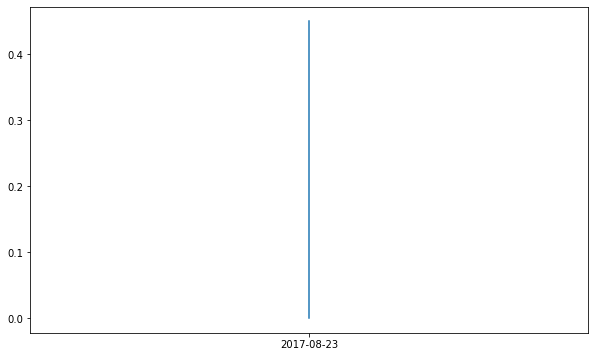

In [15]:
plt.figure(figsize=(10,6))
plt.plot(df.date, df.prcp)
plt.show()

In [16]:
#pandas for summary statistics for precipitation DATA 
df.describe()

,prcp
count,4.0000
mean,0.1325
std,0.2150
min,0.0000
25%,0.0000
50%,0.0400
75%,0.1725
max,0.4500


In [17]:
df.groupby("date").describe()

prcp                                             
           count    mean    std  min  25%   50%     75%   max
date                                                         
2017-08-23   4.0  0.1325  0.215  0.0  0.0  0.04  0.1725  0.45

In [18]:
# Design a query to show how many stations are available in this dataset?


In [19]:
query = """
            SELECT 
                *
            FROM 
                station
"""
# Query All Records in the the Database
station_df = pd.read_sql(query, con=db)

# Preview the Data
station_df.head(10)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [20]:
print(f"There are {len(station_df)} stations")

There are 9 stations


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

query = """
            SELECT 
                 s.station,
                 count(*) as count
            FROM 
                measurement m 
            JOIN station s on m.station=s.station
            GROUP BY 
                s.station
            ORDER BY 
                count desc
"""

# Query All Records in the the Database
station_df2 = pd.read_sql(query, con=db)

# Preview the Data
station_df2.head(10)

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

query = """
            SELECT 
                 m.*, 
                 s.id as station_id,
                 s.name, 
                 s.latitude, 
                 s.longitude, 
                 s.elevation
            FROM 
                measurement m 
            JOIN station s on m.station=s.station
            WHERE
                m.date >= '2016-08-23'
"""

# Query All Records in the the Database
station_data = pd.read_sql(query, con=db)

# Preview the Data
station_data.head(10)

,id,station,date,prcp,tobs,station_id,name,latitude,longitude,elevation
0,2364,USC00519397,2016-08-23,0.00,81.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2365,USC00519397,2016-08-24,0.08,79.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,2366,USC00519397,2016-08-25,0.08,80.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,2367,USC00519397,2016-08-26,0.00,79.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,2368,USC00519397,2016-08-27,0.00,77.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
5,2369,USC00519397,2016-08-28,0.01,78.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
6,2370,USC00519397,2016-08-29,0.00,78.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
7,2371,USC00519397,2016-08-30,0.00,79.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
8,2372,USC00519397,2016-08-31,0.13,80.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
9,2373,USC00519397,2016-09-01,0.00,81.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [25]:
station_data.loc[station_data.station== "USC00519397"].tobs.describe()

count    361.000000
mean      75.210526
std        4.963758
min       60.000000
25%       72.000000
50%       77.000000
75%       79.000000
max       87.000000
Name: tobs, dtype: float64

In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram



In [27]:
query = """
            SELECT 
                 m.*, 
                 s.id as station_id,
                 s.name, 
                 s.latitude, 
                 s.longitude, 
                 s.elevation
            FROM 
                measurement m 
            JOIN station s on m.station=s.station
            WHERE
                m.station = 'USC00519397'
                and date >= '2017-08-23'
"""

# Query All Records in the the Database
station_data2 = pd.read_sql(query, con=db)

# Preview the Data
station_data2.head(10)

,id,station,date,prcp,tobs,station_id,name,latitude,longitude,elevation
0,2724,USC00519397,2017-08-23,0.0,81.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


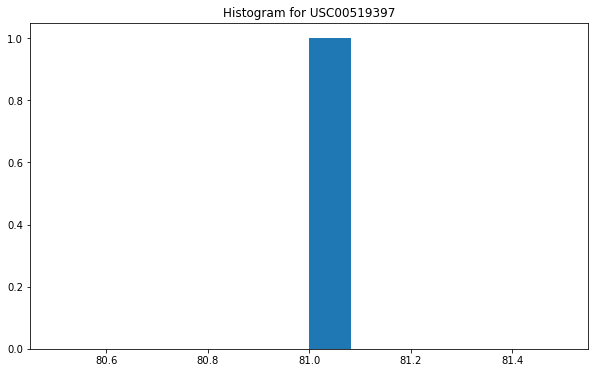

In [42]:
plt.figure(figsize=(10,6))
plt.hist(station_data2.tobs, bins=12)
plt.title("Histogram for USC00519397")
plt.show()

# Exploratory Climate Analysis

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [34]:
# Design a query to show how many stations are available in this dataset?


In [35]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [36]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [37]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
